# Your first Machine Learning Model

As we've mentioned in the slide, we're going to start making your first Machine Learning model *from scratch*!

For revision, Machine Learning model consists of two parts*: __data__ and __method (algorithm)__. We'll start with the data part.


## Introducing the Iris dataset

![imgs/iris_petal_sepal.png](imgs/iris_petal_sepal.png)

We'll first play around with the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), a dataset consisting of lengths and widths on the petal and sepal of different Iris flower.

We'll first load our data with a tool called __Pandas__.

In [3]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy

In [59]:
# Reading the dataset file
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
iris_data = pandas.read_csv('datasets/iris.data', names=names)

# Create a colour map column
classes = list(iris_data['label'].unique())
iris_data['colour'] = [classes.index(i) for i in iris_data['label']]

# Trim only first 10 rows of the data.
iris_data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,label,colour
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
5,5.4,3.9,1.7,0.4,Iris-setosa,0
6,4.6,3.4,1.4,0.3,Iris-setosa,0
7,5.0,3.4,1.5,0.2,Iris-setosa,0
8,4.4,2.9,1.4,0.2,Iris-setosa,0
9,4.9,3.1,1.5,0.1,Iris-setosa,0


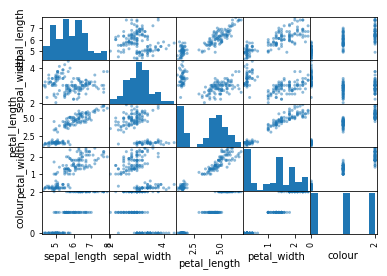

In [5]:
_ = scatter_matrix(iris_data)

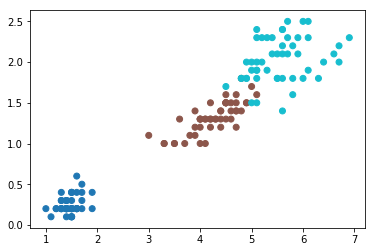

In [6]:
plt.scatter(iris_data['petal_length'], iris_data['petal_width'], c=iris_data['colour'], cmap='tab10')
plt.show()

You can simply get $n^{th}$ row of data by using `iris_data.loc[n]`, and get the property of any row with the string index.

In [7]:
iris_data.loc[0]

sepal_length            5.1
sepal_width             3.5
petal_length            1.4
petal_width             0.2
label           Iris-setosa
colour                    0
Name: 0, dtype: object

In [8]:
iris_data.loc[0]['sepal_length']

5.1

Great! This is how you'll basically the data in your dataset.

## Heading over to the model

As we've already "get" the concept of what we're trying to achieve with the $k$-NN algorithm, when given the petal/sepal length/width of the flower we wish to "predict", we simply calculate the euclidian distant from the desired length/widths given

We can do this by our hand, but fortunately, Python's got a machine learning library called `sklearn`, of which we can import and use it simply.

Head to the [sklearn's documentation on $k$-nearest neighbour](#), and answer the following question.

* How should the model be imported?
* How can we create the model's instance?
* How can we train the model with our dataset?

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
X = iris_data.loc[:, 'sepal_length':'petal_width']
y = iris_data.loc[:, 'colour']

Create the model, and train it!

In [93]:
k = 5
clf = KNeighborsClassifier(k)
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Let's try to predict one data point around here.

In [94]:
preds = [4, 1.5, 6, 1.5]

clf.predict([preds])

array([2])

And see the decision region

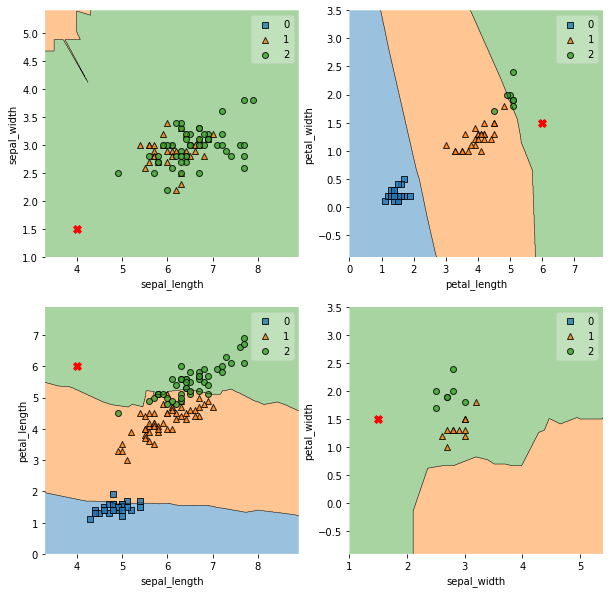

In [95]:
from mlxtend.plotting import plot_decision_regions

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

for i, n in enumerate([[0, 1, 2, 3], [2, 3, 0, 1], [0, 2, 1, 3], [1, 3, 0, 2]]):
    plot_decision_regions(X.values, y.values, clf=clf,
                         filler_feature_values={n[2]: preds[n[2]], n[3]: preds[n[3]]},
                         filler_feature_ranges={n[2]: 2, n[3]: 2},
                         feature_index=[n[0], n[1]],
                         ax=ax.flat[i])
    ax.flat[i].scatter([preds[n[0]]], [preds[n[1]]], c='red', s=60, marker='X')
    ax.flat[i].set_xlabel(names[n[0]])
    ax.flat[i].set_ylabel(names[n[1]])
plt.show()

In [96]:
clf.score(X, y)

0.9666666666666667

Try changing the $k$ for the best accuracy

__Question__: Why does $k = 1$ gives us the best accuracy (of 1.0 -- meaning that the model can predict all the data labels correctly)?

## Testing-Training split

The "good" intuition for measuring the accuracy is that we should split our dataset into testing set and training set.

`sklearn`'s got a function for us.

In [134]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.3, random_state = 4)
(X_train.shape, X_test.shape)

((105, 4), (45, 4))

In [135]:
k_2 = 1
clf_tt = KNeighborsClassifier(k_2)
clf_tt.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Evaluate the performance...

In [136]:
clf_tt.score(X_test, y_test)

0.9555555555555556

In [137]:
for k in range(1, 51):
    clf_tt = KNeighborsClassifier(k)
    clf_tt.fit(X_train, y_train)
    score = clf_tt.score(X_test, y_test)
    print("k = {}\tscore = {}".format(k, score))

k = 1	score = 0.9555555555555556
k = 2	score = 0.9555555555555556
k = 3	score = 0.9777777777777777
k = 4	score = 0.9777777777777777
k = 5	score = 0.9777777777777777
k = 6	score = 0.9777777777777777
k = 7	score = 0.9777777777777777
k = 8	score = 0.9777777777777777
k = 9	score = 0.9777777777777777
k = 10	score = 0.9777777777777777
k = 11	score = 0.9777777777777777
k = 12	score = 0.9777777777777777
k = 13	score = 0.9777777777777777
k = 14	score = 0.9777777777777777
k = 15	score = 0.9777777777777777
k = 16	score = 0.9777777777777777
k = 17	score = 0.9777777777777777
k = 18	score = 0.9777777777777777
k = 19	score = 0.9777777777777777
k = 20	score = 0.9777777777777777
k = 21	score = 0.9777777777777777
k = 22	score = 0.9777777777777777
k = 23	score = 0.9777777777777777
k = 24	score = 0.9777777777777777
k = 25	score = 0.9777777777777777
k = 26	score = 0.9777777777777777
k = 27	score = 0.9777777777777777
k = 28	score = 0.9555555555555556
k = 29	score = 0.9555555555555556
k = 30	score = 0.955555